## Edwin Molina - No supervisados
### Segundo problema dataset CC.General

In [ ]:
# Importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importar dataset

d_ccgeneral = pd.read_csv('/content/drive/MyDrive/PYTHON VERITAS/CC GENERAL (1).csv', delimiter=',')

In [ ]:
d_ccgeneral.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Verificacion de variables
d_ccgeneral.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

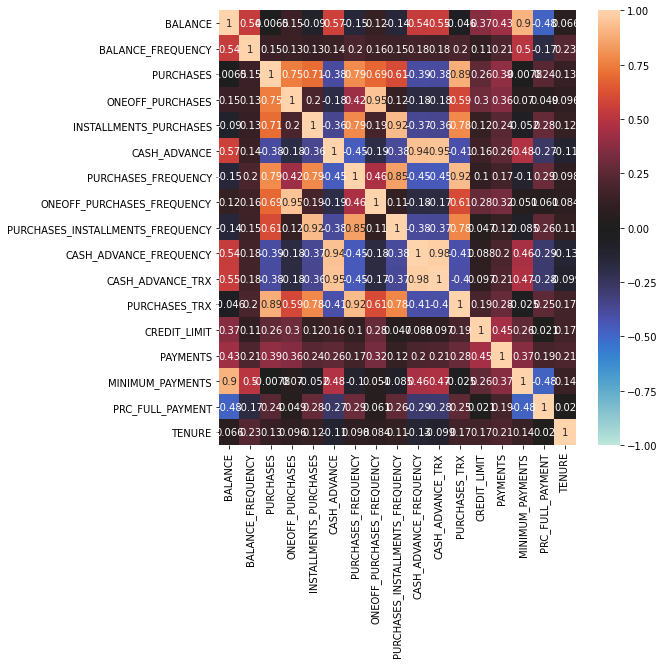

In [ ]:
# Matriz de Correlacion
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(d_ccgeneral.corr(method = 'spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
# Extrayendo variables a utilizar, solamente 'BALANCE' y 'PURCHASES'
datos2 = d_ccgeneral.iloc[:, [1,3]].values

In [ ]:
datos2

array([[  40.900749,   95.4     ],
       [3202.467416,    0.      ],
       [2495.148862,  773.17    ],
       ...,
       [  23.398673,  144.4     ],
       [  13.457564,    0.      ],
       [ 372.708075, 1093.25    ]])

In [ ]:
# Reasignando variable
Z = datos2

In [ ]:
# K-means con el codo de Jambu

from sklearn.cluster import KMeans

def elbow_method(epsilon, figure = False):
  wcss = []

  diff = np.inf
  i = 1

  while diff > epsilon:
    print("Iteracion N Clusters: k: {k}".format(k=i))

    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Z)

    if diff == np.inf:
      diff = kmeans.inertia_

    elif kmeans.inertia_ == 0:
      wcss.append(kmeans.inertia_)
      break

    else: 
      diff = (wcss[-1] - kmeans.inertia_) / wcss[-1]
    wcss.append(kmeans.inertia_)
    i += 1

  if figure: 
    plt.plot(range(0, len(wcss)), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Numero idoneo de clusters')
    plt.ylabel('WCSS')
    plt.show()

    k = i - 1
    return wcss, k

Iteracion N Clusters: k: 1
Iteracion N Clusters: k: 2
Iteracion N Clusters: k: 3
Iteracion N Clusters: k: 4
Iteracion N Clusters: k: 5
Iteracion N Clusters: k: 6
Iteracion N Clusters: k: 7
Iteracion N Clusters: k: 8
Iteracion N Clusters: k: 9
Iteracion N Clusters: k: 10
Iteracion N Clusters: k: 11
Iteracion N Clusters: k: 12
Iteracion N Clusters: k: 13
Iteracion N Clusters: k: 14
Iteracion N Clusters: k: 15
Iteracion N Clusters: k: 16
Iteracion N Clusters: k: 17
Iteracion N Clusters: k: 18
Iteracion N Clusters: k: 19
Iteracion N Clusters: k: 20


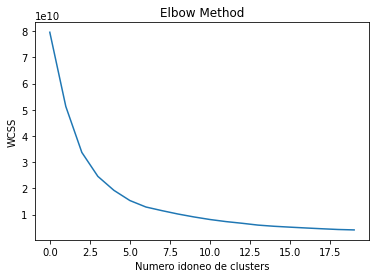

In [ ]:
# Visualizacion de resultados

epsilon = 0.05
wcss, _ = elbow_method(epsilon, figure = True)

Iteracion N Clusters: k: 1
Iteracion N Clusters: k: 2
Iteracion N Clusters: k: 3
Iteracion N Clusters: k: 4


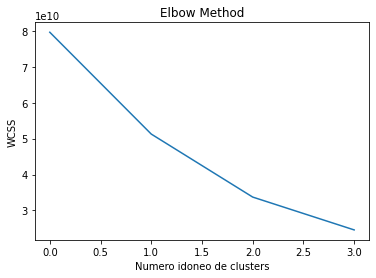

In [ ]:
# k optima para cantidad de clusters a visualizar

epsilon = 0.30
_, k = elbow_method(epsilon, figure= True)

In [ ]:
# k-means 
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Z) 

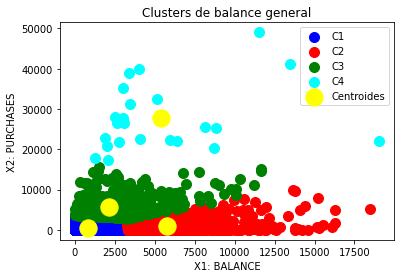

In [ ]:
# Visualizacion de los clusters

plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'C4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de balance general')
plt.xlabel('X1: BALANCE')
plt.ylabel('X2: PURCHASES')
plt.legend()
plt.show()

En el grafico anterior se muestran 4 clusters asociados a las variables balance y purchases. El cluster # 1 de color azul se encuentra en purchases entre 0 y 1000. mientras que en balance se encuentra entre 0 y 2800. El cluster # 2 de color rojo en purchases tiene valores entre 0 y 10000, mientras que en balance se encuentra entre 2800 y 18000. El Cluster # 3 de color verde se encuentra en purchase entre 1000 y 10800, mientras que en balance se encuentra entre 1000 y 12,300. El cluster # 4 de color celeste se encuentra en purchases entre 10800 y 40900, y en balance tiene valores entre 1000 y 18000.

### Clusterizacion Jerarquica

In [ ]:
import scipy.cluster.hierarchy as sch

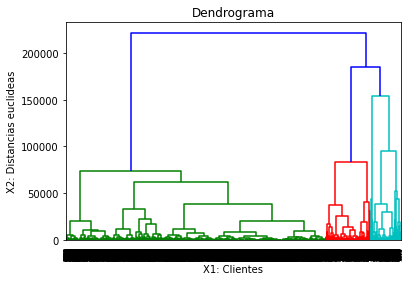

In [ ]:
# Metodo ward

dendrogram = sch.dendrogram(sch.linkage(Z, method = 'ward')) 
plt.title('Dendrograma')
plt.xlabel('X1: Clientes')
plt.ylabel('X2: Distancias euclideas')
plt.show()


In [ ]:
# Espacio bidimensional de 3 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Z)

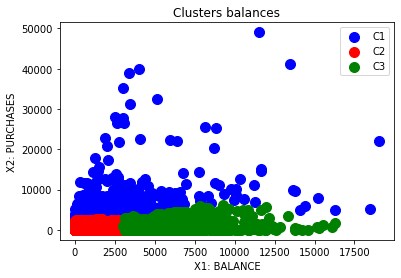

In [ ]:
# Visualizacion de clusters
plt.scatter(Z[y_hc == 0, 0], Z[y_hc == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(Z[y_hc == 1, 0], Z[y_hc == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(Z[y_hc == 2, 0], Z[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')

plt.title('Clusters balances')
plt.xlabel('X1: BALANCE')
plt.ylabel('X2: PURCHASES')
plt.legend()
plt.show()

El grafico muestra 3 clusters, el cluster # 1 de color azul muestra que en purchases se encuentre desde 1000 hasta 40900, mientras que en balance muestra valores desde 0 hasta 18000. El cluster # 2 de color rojo muestra valores en purchase desde 0 hasta 1000 y en balance desde 0 hasta 2700. El cluster # 3 de color verde muestra valores en purchases desde 0 hasta 2000 y en balance desde 2700 hasta 1700. 

Los clusters nos brindan informacion del comportamiento de los clientes entre sus compras y sus balances en cuenta. Se observa que los incluidos en el cluster # 1 azul, tienen cuentas en balance con valores más altos y al mismo tiempo un poder adquisitivo mayor que se representa por mayores compras. Para el cluster # 2 de color rojo, se muestra que esos clientes mantienen cifras menores a los 3000 en sus balances por lo que su poder adquisitivo es mejor y se refleja en menores valores de compra (purchases). Por ultimo los clientes en el cluster # 3 tienen balances en cuenta desde 2700 hasta 17000 por lo que se puede decir que es un poder adquisitivo medio entre los clusters anteriores, sin embargo los valores de compra se mantienen bajos muy similares a los del cluster # 2.
